# Pandas
## Series/vectors 
* a series is a 1D array that can hold any data type and can be indexed by labels as well as zero-based integers
* data within a series does not have to be homogeneous 
* can be created from a list with standard integer indexing or given labels
* can be created from dictionary key-value pairs, or as a repeated series

In [163]:
import pandas as pd

# converting from list with standard indexing
list = [2, 3, 4, 5, 6]
series1 = pd.Series(list)
print("from standard list:\n", series1)

# converting from list with custom indexing
index = ['a','b','c','d','e']
series2_1 = pd.Series(list, index=index)
series2_2 = pd.Series(list, index=['f','g','h','i','j'])
print("custom indexing: from lists\n", series2_1)

# from dictionary
dict = {'sun':1, 'mon':2, 'tues':3, 'wed':4}
series3 = pd.Series(dict)
print("\nfrom a dictionary:\n", series3)

# repeating values
series4 = pd.Series(3, index=['x','y','z'])
print("\nrepeated values:\n", series4)

from standard list:
 0    2
1    3
2    4
3    5
4    6
dtype: int64
custom indexing: from lists
 a    2
b    3
c    4
d    5
e    6
dtype: int64

from a dictionary:
 sun     1
mon     2
tues    3
wed     4
dtype: int64

repeated values:
 x    3
y    3
z    3
dtype: int64


## dataframes
* dataframes are 2d tables similar to spreadsheets
* dataframes have homogeneous data within each column, but the columns can be heterogeneous from each other 
* dataframes are size mutable within columns and overall
* they can be created from a dictionary, excel spreadsheet, a list of lists, or from a numpy array

In [164]:
# from dictionary
dict2 = {
    "UID": [11223300, 22334400, 33445500],
    "GPA": [3.1, 3.9, 2.3],
    "Year": [1, 4, 2]
}
dictFrame = pd.DataFrame(dict2)
print("from dictionary:\n", dictFrame)

import numpy as np
# from numpy array
nparray = np.array([[1, 2.4, 1/5],[2, 4.3, 2/6]])
npFrame = pd.DataFrame(nparray, columns=['int','float','frac'])
print("\nfrom numpy array\n", npFrame)

from dictionary:
         UID  GPA  Year
0  11223300  3.1     1
1  22334400  3.9     4
2  33445500  2.3     2

from numpy array
    int  float      frac
0  1.0    2.4  0.200000
1  2.0    4.3  0.333333


### reading and writing files
* reading a csv file: pd.read_csv(filename)
* writing to csv: frameName.to_csv(filename)
* reading a excel file: pd.read_excel(filename)
* writing to excel: frameName.to_excel(filename)

In [165]:
# reading from a csv file:
flowerset = pd.read_csv('flower_dataset.csv')
flowerset.head()

,species,size,fragrance,height_cm
0,rose,medium,mild,48.55
1,shoeblack plant,medium,mild,147.07
2,shoeblack plant,medium,none,102.93
3,hibiscus,large,none,184.00
4,shoeblack plant,large,mild,83.07


### querying 
* boolean indexing: frame[frame[label] >=< value]
* .query('label <=> value and label <=> value')
* .loc[]
* isin(): frame[frame[label].isin(value)]
* between(): filters for values between two given values. frame[frame[label].between(low, high)]

In [166]:
filter1 = flowerset[flowerset['size'] == 'medium']
print(filter1)
print()
filter2 = flowerset.query('size == "medium" and fragrance == "mild" and height_cm < 31')
print(filter2)

              species    size fragrance  height_cm
0                rose  medium      mild      48.55
1     shoeblack plant  medium      mild     147.07
2     shoeblack plant  medium      none     102.93
15    shoeblack plant  medium      none     101.99
16               rose  medium    strong      33.10
...               ...     ...       ...        ...
9983             rose  medium      mild      64.34
9986             rose  medium    strong      48.27
9989             rose  medium    strong      50.14
9996  shoeblack plant  medium      mild     145.23
9999             rose  medium      mild      88.11

[3337 rows x 4 columns]

     species    size fragrance  height_cm
2993    rose  medium      mild      30.85
3784    rose  medium      mild      30.70
4716    rose  medium      mild      30.53
5875    rose  medium      mild      30.54
6925    rose  medium      mild      30.23
7070    rose  medium      mild      30.85
7130    rose  medium      mild      30.27
8221    rose  medium      

### resizing: adding/dropping columns
* declaring a list as a new column 
* frame.insert(loc, column, value), where loc is insertion index, column is the column label, value is the column values
* frame.assign(**kwargs): returns a NEW dataframe with updated/added columns. good for if the new column will be the same for chunks of the preexisting frame, for modifying singular values, or for changing large chunks of values to same value. also wors with lambda functions
* pd.concat(objs, axis, join,...), where objs are the data frame(s) to be combined, axis is the axis to concatenate along (0 for rows, 1 for columns)
* frame.drop(labels, axis=1) drops the specified column(s)

In [167]:
# adding a new column: with a list
colorlist = []
colors = ['red','yellow','pink','white']
for i in range(len(flowerset)):
    if flowerset.loc[i, 'species'] == 'rose':
        colorlist.append(np.random.choice(colors))
    else:
        colorlist.append("-")
flowerset['color'] = colorlist

filter2 = flowerset.query('size == "medium" and fragrance == "mild" and height_cm < 31')
print(filter2)


     species    size fragrance  height_cm   color
2993    rose  medium      mild      30.85   white
3784    rose  medium      mild      30.70    pink
4716    rose  medium      mild      30.53  yellow
5875    rose  medium      mild      30.54  yellow
6925    rose  medium      mild      30.23    pink
7070    rose  medium      mild      30.85   white
7130    rose  medium      mild      30.27  yellow
8221    rose  medium      mild      30.94    pink
8448    rose  medium      mild      30.36     red
9587    rose  medium      mild      30.89  yellow
9625    rose  medium      mild      30.55     red
9831    rose  medium      mild      30.55    pink


### slicing 
* rows by index range: frame[1:4]
* rows and colums: frame.loc[] allows slicing by labels, frame.iloc[] allows slicing by integer indicies

In [168]:
sliced1 = flowerset.loc[1:100, ['species','color']]
print(sliced1)

sliced2 = flowerset.iloc[4:16, 0:2]
print(sliced2)

             species  color
1    shoeblack plant      -
2    shoeblack plant      -
3           hibiscus      -
4    shoeblack plant      -
5           hibiscus      -
..               ...    ...
96              rose  white
97              rose   pink
98   shoeblack plant      -
99          hibiscus      -
100             rose    red

[100 rows x 2 columns]
            species    size
4   shoeblack plant   large
5          hibiscus   large
6              rose   small
7              rose   small
8          hibiscus   large
9   shoeblack plant   large
10             rose   small
11             rose   small
12         hibiscus   large
13         hibiscus   large
14             rose   small
15  shoeblack plant  medium


# Sci-kit learn

* also referred to as sklearn, is built on top of numpy
* common practice is to save features to variable X and the labels to variable Y

modules of interest:
1. datasets (.datasets) includes loaders to load external datasets and generators to provide small datasets (called 'toy' datasets)
2. preprocessing (.preprocessing) includes methods to preprocess data, such as LabelEncoder, robust_scale and scale (for standardizing), normalize, etc
3. model selection (.model_selection) to split data, perform cross validation, etc
4. metrics (.metrics) methods for model selection interface (scorers), classification metrics (accuracy scores, area under curve, confusion matrix, error rates, precision, etc), regression metrics (abs error, variance, max error, MSE, RMS, etc), multilabel ranking metrics, clustering metrics (calinski-harabasz, davies-bouldin, silhouette, etc), biclustering, distance, pairwise, plotting (confusion matrix, DET curve, prediction error visualization) 
5. linear models (.linear_model)
6. tree based models (.tree) like DecisionTreeClassifier and DecisionTreeRegressor
7. ensemble methods (.ensemble) like RandomForestClassifier
8. neighbors (.neighbors) like KNeighborsClassifier
9. naive bayes (.naive_bayes)
10. clustering (.cluster) KMeans, DBSCAN
11. feature selection (.feature_selection) and extraction (.feature.extraction)
12. neural networks (.neural_network) MPL classifier and regressor
13. calibration (.calibration)
14. imputation (.impute) to handle missing data
15. semi-sup learning (.semi_supervised) and discriminant analysis (.discriminant_analysis)
16. exceptions (.exceptions) for exceptions unique to scikit learn


## sci kit for random forest classifier

### PREPROCESSING: converting from nonnumeric to numeric 
2 general ways to convert to numeric: label encoding is preferred for ordinal categories (when the category has an obvious order, like weak/medium/strong), and one-hot is preferred for categories with no particular order (like rose/lily/sunflower)
1. label encoding: converts each unique value in a categorical column to an integer
* import LabelEncoder from Preprocessing module
* initialize an instance of LabelEncoder object
* LabelEncoder works on a single column at a time, using the syntax dataFrame['newColumnName'] = label_encoder.fit_transform(data['origColumnName']). it can be applied to the whole frame using Pandas apply()
2. one-hot coding: converts categorical variables into a series of binary columns; ex ['red','blue', 'purple'] becomes [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
* import OneHotEncoder from preprocessing
* initialize an instance of OneHotEncoder, setting sparse_output to false to get a dense array. can set drop to certain indicies to drop certain columns?
* apply oneHot by using OneHotEncoderName.fit_transform(variableData)
* this will result in a numpy array which will have to be converted back to a dataframe. <br> Alternatively: use pandas.get_dummies(). 

<br>
can also manually convert to numeric if there are only a few variables per category using the map method with key value pairs, ex: <br>
fdata['size'] = fdata['size'].map({'small':1, 'medium':2, 'large':3})

In [175]:
import sklearn
import pandas as pd

fdata = pd.read_csv("flower_dataset.csv")

# converting nonnumeric to numeric for random forest classification: using labelEncoder
# species column is not ordinal, but i don't feel like messing with onehot encoding rn
from sklearn.preprocessing import LabelEncoder
lblEncoder = LabelEncoder()

# remember: use iloc for accessing columns by numerical index. .iloc[rows, columns]
encData = pd.DataFrame()
encData["species_enc"] = fdata["species"].map({'rose':4, 'shoeblack plant':14, 'hibiscus':8})
encData[["size_enc", "frag_enc"]] = fdata.iloc[:, 1:-1].apply(lblEncoder.fit_transform)

# use concat to insert encoded columns after original ones and before height column
# considering fdata to be 2 frames (up to index 2 and index 3) and encData
insertAt = fdata.columns.get_loc("height_cm")
fdata = pd.concat([fdata.iloc[:, :insertAt], encData, fdata.iloc[:, insertAt:]], axis=1)
fdata.head()


      species_enc  size_enc  frag_enc
0               4         1         0
1              14         1         0
2              14         1         1
3               8         0         1
4              14         0         0
...           ...       ...       ...
9995            8         0         1
9996           14         1         0
9997            8         0         1
9998           14         0         1
9999            4         1         0

[10000 rows x 3 columns]


,species,size,fragrance,species_enc,size_enc,frag_enc,height_cm
0,rose,medium,mild,4,1,0,48.55
1,shoeblack plant,medium,mild,14,1,0,147.07
2,shoeblack plant,medium,none,14,1,1,102.93
3,hibiscus,large,none,8,0,1,184.00
4,shoeblack plant,large,mild,14,0,0,83.07


In [181]:
# assuming target label is species (rose, shoeblack plant, or hibiscus)
# dataframe drop method drops the specified row/column and keeps the rest of
# the dataframe (axis=0 for index, axis=1 for columns). here drop up to encoded size column
y = fdata["species_enc"]
X = fdata.drop(fdata.iloc[:, :fdata.columns.get_loc("size_enc")], axis=1)

# pandas value_counts shows counts of unique values, ex. how many of each
# species is in the dataset
y.value_counts()

y.head()

0     4
1    14
2    14
3     8
4    14
Name: species_enc, dtype: int64

### PREPROCESSING: splitting data
* scikit has a method to split datasets into training and testing sets
* import train_test_split from sklearn.model_selection
* train_test_split(*arrays, test_size, train_size, random_state, shuffle, stratify)
* arrays is the input arrays to be split
* test and train size are the proportion of the dataset to include in the split, betweeen 0.0 to 1.0. if neither are set, test will be set to 0.25. if only one is specified, the other will be set to its compliment (default is test=0.25, train=0.75)
* random_state and shuffle determine whether the data is shuffled before and after splitting. default is none for random_state and true for shuffling
* returns a tuple of arrays in the order ([array1_train], [array1_test], [array2_train], [array2_test], ... [arrayN_train], [arrayN_test]) up to the number of input arrays. these can be unpacked when calling the method

In [183]:
from sklearn.model_selection import train_test_split

# input X and Y and unpack into 4 lists. show shapes of these lists 
# at this point, data is ready to apply a model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
print(X_train)

      size_enc  frag_enc  height_cm
6782         1         1      78.99
3009         2         2      48.58
5416         1         1      62.41
3877         0         1     144.75
3713         0         1     119.45
...        ...       ...        ...
400          2         2      56.84
1117         1         0      97.49
6065         1         1     100.63
2827         1         1     106.46
3492         0         1     143.09

[7500 rows x 3 columns]


### FITTING
* clf is short for classifier
* documentation: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier
* use the get_params() method to return the parameters for the estimator
* fit(X, y) method will actually create the classifier by fitting the data. only takes numerical data, so all nonnumeric data must be encoded first (during preprocessing)
* after data is fitted, predict(X) can be used to actually predict the target values 

In [184]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# use get_params() to see the current parameters for the classifier. leave 
# as default for now
clf.get_params()

# in order to use the fit() method, nonnumeric data has to be converted to numeric
# fitting data to model
clf.fit(X=X_train, y=y_train)

# predicting:
y_predict = clf.predict(X=X_test)

# checking accuracy:
from sklearn.metrics import accuracy_score
train_acc = accuracy_score(y_test, y_predict)
print(f"accuracy is: {train_acc*100:.2f}%")

accuracy is: 88.12%


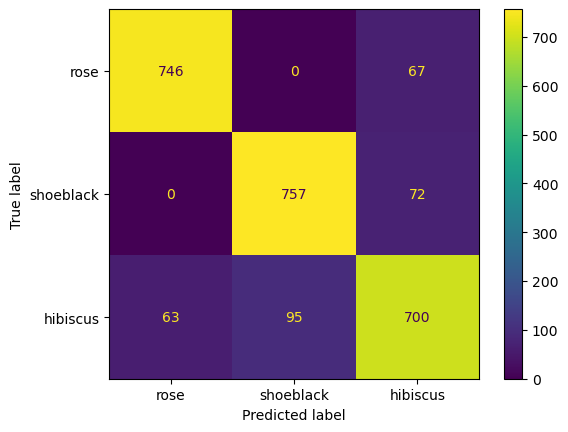

In [186]:
#from sklearn.metrics import confusion_matrix
import sklearn.metrics as met
cm = met.confusion_matrix(y_test, y_predict)
met.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["rose","shoeblack","hibiscus"]).plot()